<img src="./logo_UTN.svg" align="right" width="150" /> 

# Procesamiento Digital de Se√±ales

## TS6

### Adri√°n Pablo Cafa
 



1) Implemente las funciones para generar las siguientes ventanas w(k):

Bartlett √≥ triangular
Hann
Blackman
Flat-top
Ayuda: Puede consultar el cap√≠tulo 7.3 del mismo libro para obtener las expresiones anal√≠ticas de cada ventana.

a) Para cada ventana grafique w(k) y |W(Œ©)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud m√°xima de |W(Œ©)| (l√≥bulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Œ©)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del l√≥bulo principal de cada ventana:

Œ©0 ser√° la frecuencia del primer cruce por cero, es decir |W(Œ©)| =0 y 
Œ©1, aquella frecuencia tal que |W(Œ©1)|=2‚àö2‚à®‚àí3 dB y 
el valor de transferencia m√°xima de los l√≥bulos secundarios (expresado en dB)
W2=max{|W(Œ©)|},  ‚àÄ Œ©‚â•Œ©0


Sugerencia: Normalice Œ©0,1 por Œîf=fS‚àöN para facilitar la comparaci√≥n.

Descripci√≥n de las ventanas
 
 
Œ©0	Œ©1	 W2
Rectangular	 	 	 
Bartlett	 	 	 
Hann	 	 	 
Blackman	 	 	 
Flat-top	 	 	 

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 15 22:12:36 2021

@author: ADRIAN CAFA
"""
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.fft import *
mpl.rcParams['figure.figsize'] = (12,13)

In [6]:
N = 1000
Npad = 10 * N
fs = 1000
f = np.linspace(0, (N-1)*(fs/N), N)
f_pad = np.linspace(0, (Npad-1)*(fs/(Npad)), Npad)
t_pad = np.linspace(0, (Npad-1)/fs, Npad)
t = np.linspace(0, (N-1)/fs, N)

### Rectangular

$w[k] = \text{rect}_N[k]$ tiene en cuenta todas las muestras con el mismo peso. El l√≥bulo principal de su espectro de magnitud es estrecho, pero el nivel de los l√≥bulos laterales es bastante alto. Tiene la mayor selectividad de frecuencias.

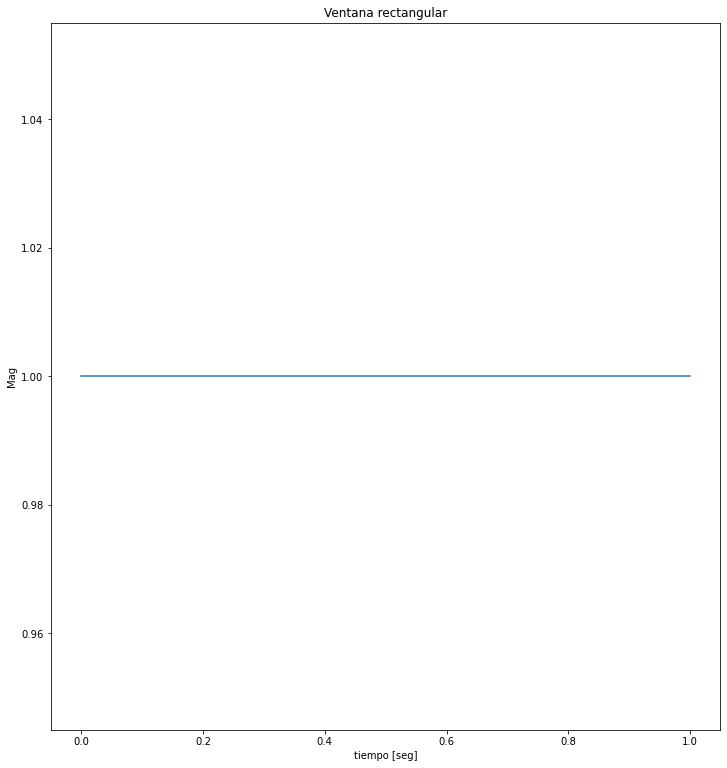

<ipython-input-7-0a8ee366732e>:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(box_fft),':x', lw=2, label='$ k0 = $' + 'box')


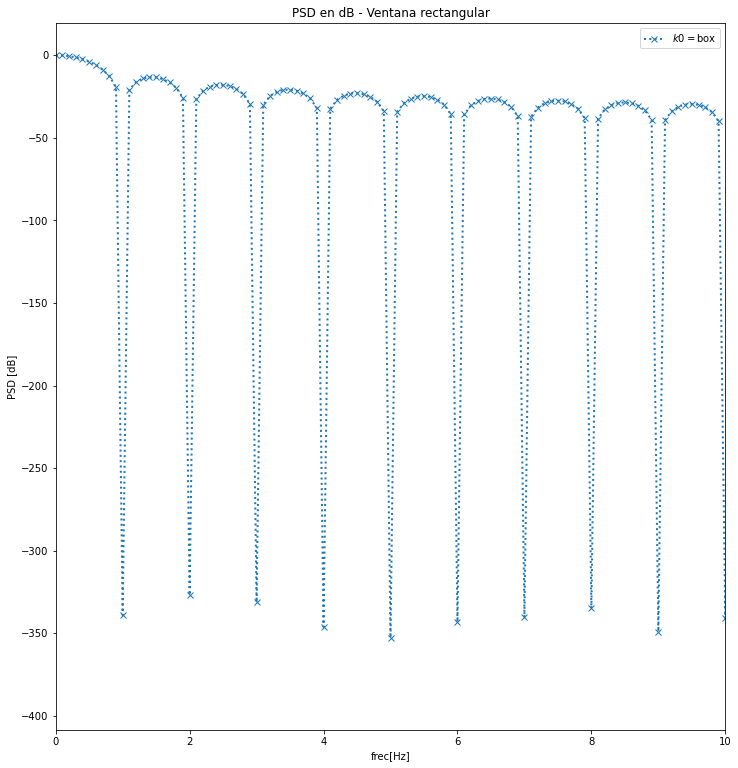

In [7]:
####################################################################
###########        Rectangular             #########################
####################################################################

box = signal.windows.boxcar(N)

plt.figure(1)

plt.plot(t,box)
plt.title("Ventana rectangular")
plt.ylabel("Mag")
plt.xlabel("tiempo [seg]")
axes_hdl = plt.gca()
plt.show()

box_fft = np.abs((1/N)*fft(box, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_box_fft = np.amax(box_fft)
box_fft = box_fft/maxElement_box_fft # Normalizo para que la pot max sea 1 dB

plt.figure(2)

plt.plot(f_pad, 20* np.log10(box_fft),':x', lw=2, label='$ k0 = $' + 'box')
plt.title("PSD en dB - Ventana rectangular")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

### Bartlett √≥ triangular

La ventana triangular puede expresarse como la convoluci√≥n de dos ventanas rectangulares ùë§[ùëò]=rectùëÅ[ùëò]‚àórectùëÅ[ùëò] . El l√≥bulo principal es m√°s amplio que para la ventana rectangular, pero el nivel de los l√≥bulos laterales decae m√°s r√°pidamente.

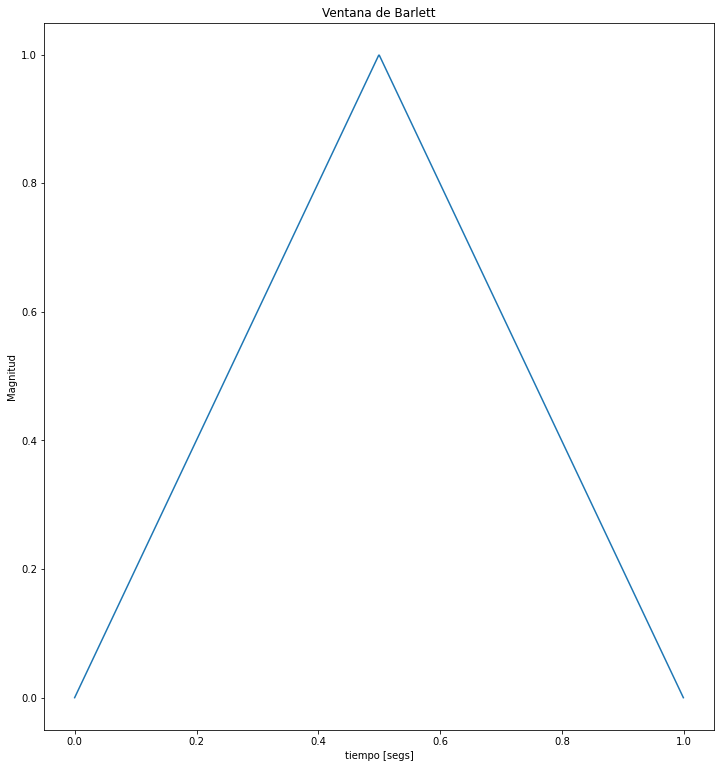

<ipython-input-8-54d95e40f84b>:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(barlett_fft),':x', lw=2, label='$ k0 = $' + 'barlett')


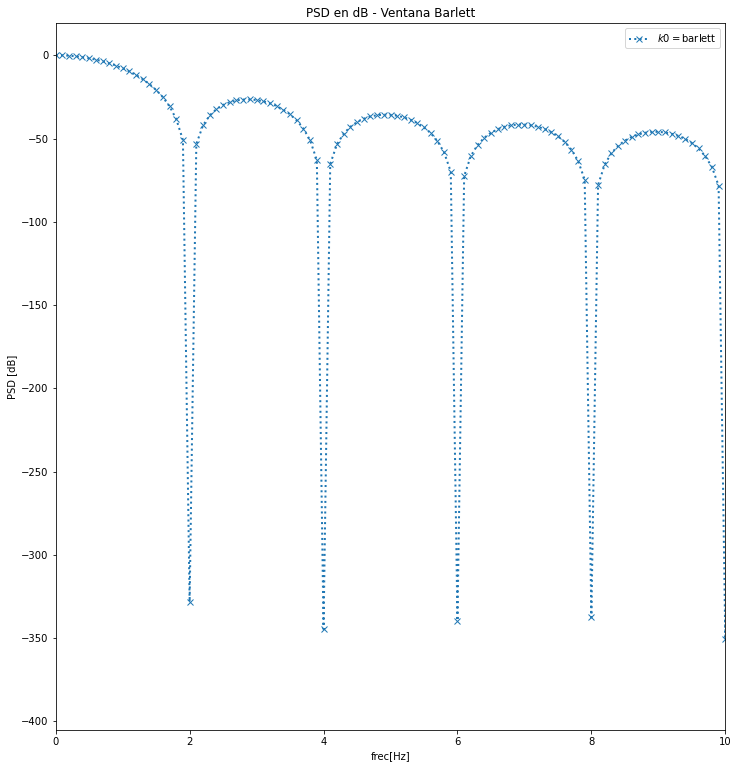

In [8]:
####################################################################
###########        Bartlett √≥ triangular   #########################
####################################################################

barlett = signal.windows.bartlett(N)

plt.figure(3)

plt.plot(t,barlett)
plt.title("Ventana de Barlett")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")

axes_hdl = plt.gca()

plt.show()

barlett_fft = np.abs((1/N)*fft(barlett, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_barlett_fft = np.amax(barlett_fft)
barlett_fft = barlett_fft/maxElement_barlett_fft # Normalizo para que la pot max sea 1 dB



plt.figure(4)

plt.plot(f_pad, 20* np.log10(barlett_fft),':x', lw=2, label='$ k0 = $' + 'barlett')
plt.title("PSD en dB - Ventana Barlett")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

### Hann

$w[k] = \frac{1}{2} ( 1 - \cos(2 \pi \frac{k}{N}))$ es una ventana suave cuyo primer y √∫ltimo valor es cero. Presenta un r√°pido decaimiento de los l√≥bulos laterales.

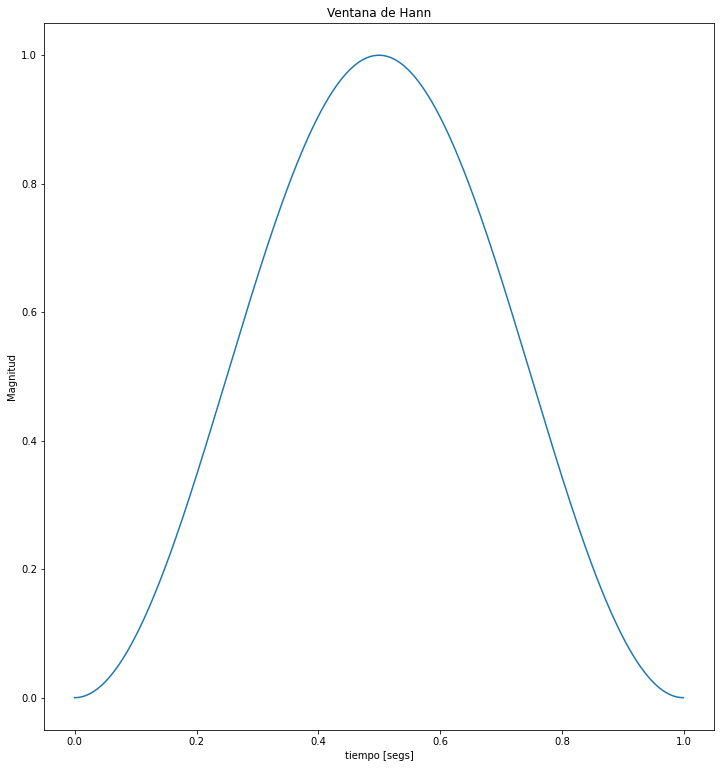

<ipython-input-9-d2e4f82dc2f8>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(hann_fft),':x', lw=2, label='$ k0 = $' + 'hann')


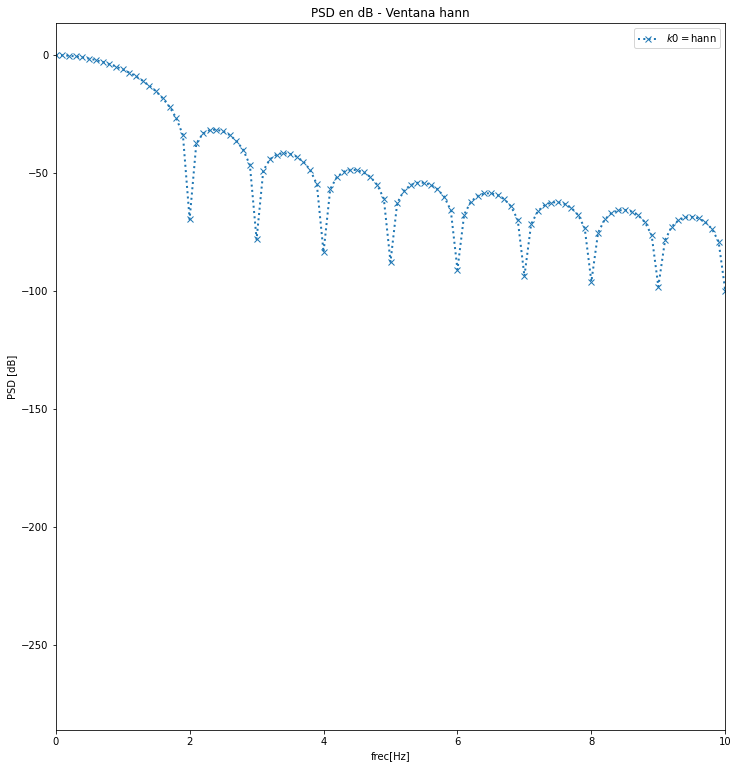

In [9]:
####################################################################
###########        Hann                    #########################
####################################################################

hann = signal.windows.hann(N)

plt.figure(5)

plt.plot(t,hann)
plt.title("Ventana de Hann")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")
axes_hdl = plt.gca()
plt.show()


hann_fft = np.abs((1/N)*fft(hann, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_hann_fft = np.amax(hann_fft)
hann_fft = hann_fft/maxElement_hann_fft # Normalizo para que la pot max sea 1 dB

plt.figure(6)

plt.plot(f_pad, 20* np.log10(hann_fft),':x', lw=2, label='$ k0 = $' + 'hann')
plt.title("PSD en dB - Ventana hann")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()



### Blackman

$w[k] =  0.42 - 0.5 \cos(2 \pi \frac{k}{N}) + 0.08 \cos(4 \pi \frac{k}{N})$ se caracteriza por un r√°pido decaimiento de los l√≥bulos laterales a costa de un l√≥bulo principal amplio y una selectividad de baja frecuencia.

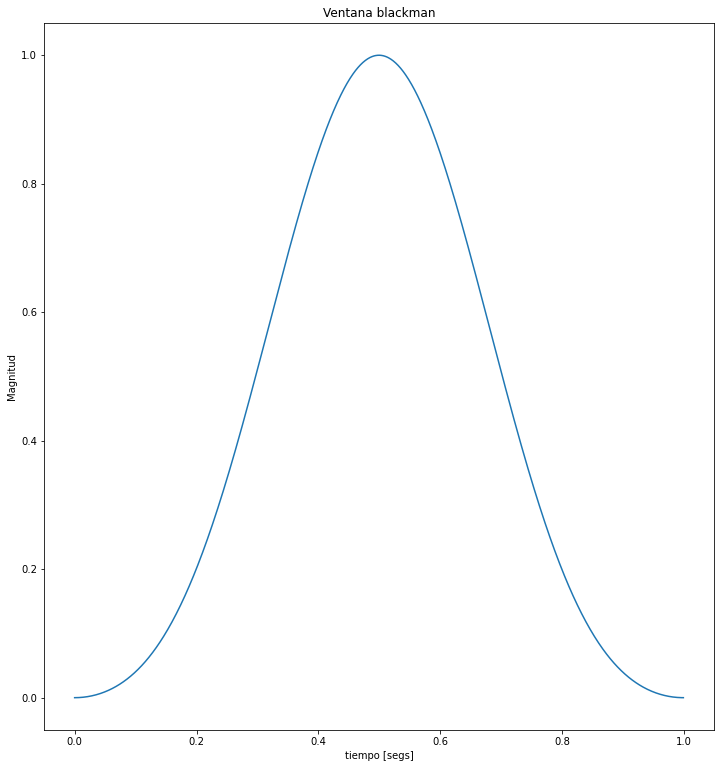

<ipython-input-10-d44d99f151af>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(blackman_fft),':x', lw=2, label='$ k0 = $' + 'blackman')


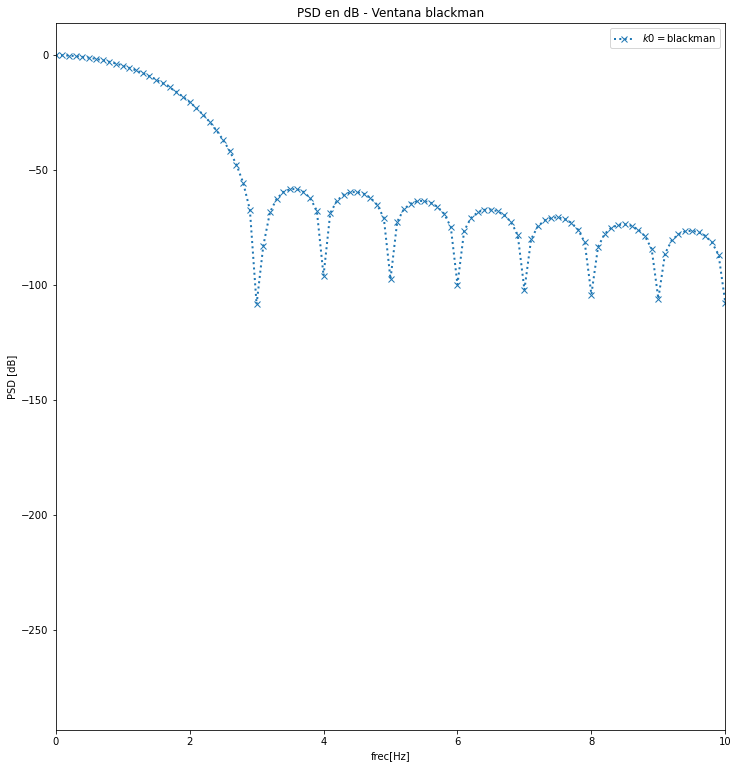

In [10]:
####################################################################
###########        Blackman                #########################
####################################################################

blackman = signal.windows.blackman(N)

plt.figure(7)

plt.plot(t,blackman)
plt.title("Ventana blackman")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")
axes_hdl = plt.gca()

plt.show()

blackman_fft = np.abs((1/N)*fft(blackman, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_blackman_fft = np.amax(blackman_fft)
blackman_fft = blackman_fft/maxElement_blackman_fft # Normalizo para que la pot max sea 1 dB

plt.figure(8)

plt.plot(f_pad, 20* np.log10(blackman_fft),':x', lw=2, label='$ k0 = $' + 'blackman')
plt.title("PSD en dB - Ventana blackman")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

### Flat-top

La ventana superior plana tambi√©n es sinusoidal, pero en realidad cruza la l√≠nea del cero. Esto provoca un
un pico mucho m√°s amplio en el dominio de la frecuencia, que est√° m√°s cerca de la verdadera amplitud de la
se√±al que con otras ventanas. Esa propiedad es deseable para la medici√≥n de amplitudes de componentes de frecuencia senoidales. Los inconvenientes del ancho de banda amplio son la escasa resoluci√≥n en frecuencia y el elevado Ancho de banda de ruido.

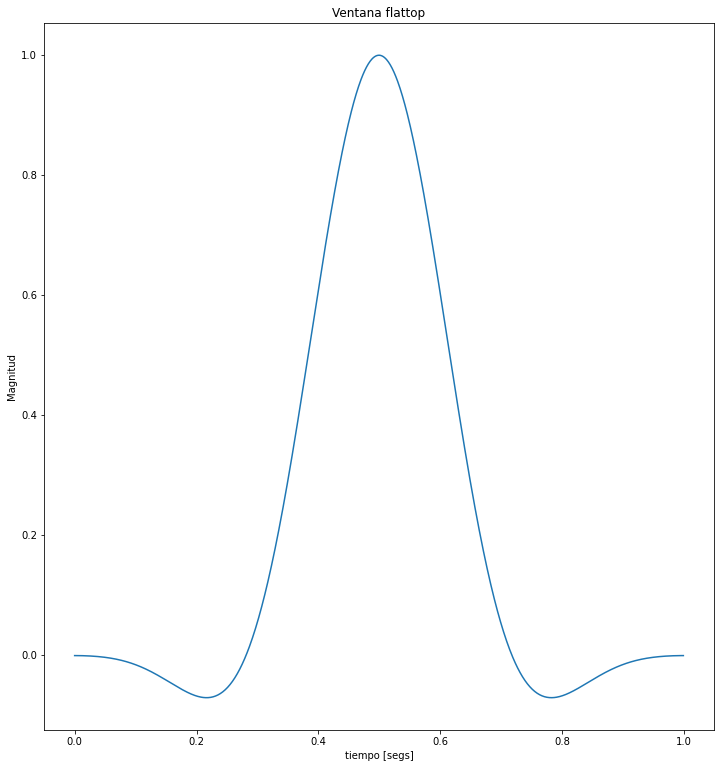

<ipython-input-11-a9d5764389ce>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(flattop_fft),':x', lw=2, label='$ k0 = $' + 'flattop')


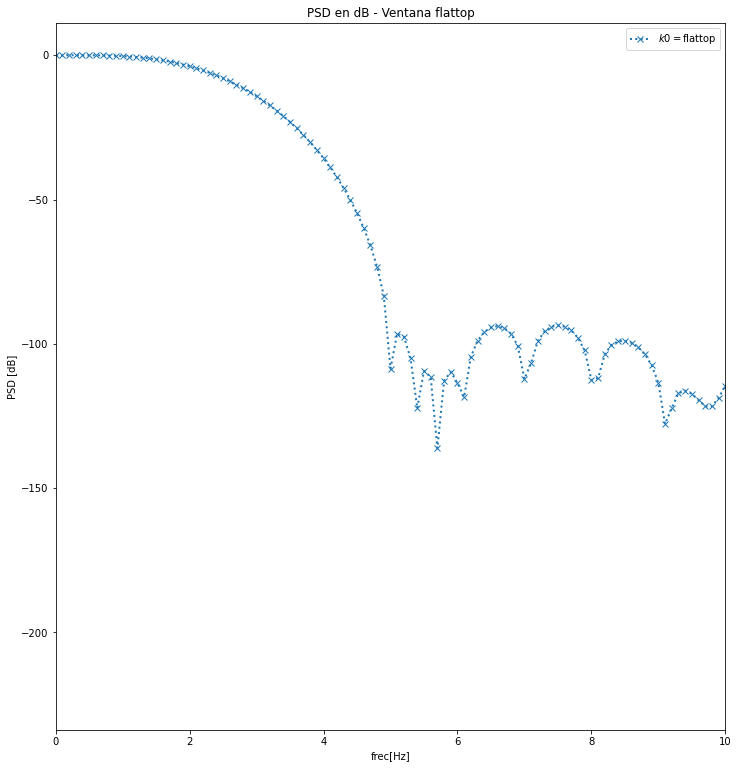

In [11]:
####################################################################
###########        Flat-top                #########################
####################################################################

flattop = signal.windows.flattop(N)

plt.figure(9)

plt.plot(t,flattop)
plt.title("Ventana flattop")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")
axes_hdl = plt.gca()
plt.show()


flattop_fft = np.abs((1/N)*fft(flattop, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_flattop_fft = np.amax(flattop_fft)
flattop_fft = flattop_fft/maxElement_flattop_fft # Normalizo para que la pot max sea 1 dB

plt.figure(10)

plt.plot(f_pad, 20* np.log10(flattop_fft),':x', lw=2, label='$ k0 = $' + 'flattop')
plt.title("PSD en dB - Ventana flattop")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

Las distintas funciones de ventana tienen propiedades diferentes. Por ejemplo, con respecto a la capacidad de distinguir dos se√±ales vecinas (resoluci√≥n de frecuencia) o de detectar dos se√±ales cuando una es mucho m√°s d√©bil (nivel de l√≥bulos laterales). Dado que estos dos aspectos se contraponen en las funciones de ventana t√≠picas, la elecci√≥n de una ventana adecuada depende en gran medida de la aplicaci√≥n. En primer lugar, se examinan las funciones de ventana aplicadas con frecuencia y sus propiedades espectrales. A continuaci√≥n, se comparan las funciones de ventana mediante las m√©tricas de evaluaci√≥n m√°s utilizadas.

### Comparaci√≥n de las funciones ventana

Adem√°s de inspeccionar la DTFT de las funciones de ventana, tambi√©n se utilizan diversas m√©tricas de evaluaci√≥n para la comparaci√≥n o selecci√≥n de las funciones de ventana. Tres de las medidas m√°s destacadas en el an√°lisis espectral son

1. **Amplitud del l√≥bulo principal**:
La anchura del l√≥bulo principal en t√©rminos de frecuencia normalizada se mide entre los dos puntos en los que su valor m√°ximo se reduce a la mitad (- 3dB). Esta medida est√° relacionada con la capacidad de detectar dos se√±ales exponenciales con niveles comparables y frecuencias similares.

2. **Amplitud relativa de los l√≥bulos laterales**:
Relaci√≥n en t√©rminos de amplitud entre el m√°ximo del l√≥bulo principal y el nivel m√°ximo de los l√≥bulos laterales. Esta medida est√° relacionada con el rendimiento de la detecci√≥n cuando hay dos o m√°s se√±ales exponenciales con niveles dispares y frecuencias dis√≠miles.

3. **Error de muestreo m√°ximo**:
Error de amplitud m√°xima cuando no se alcanza el m√°ximo del l√≥bulo principal al muestrear el espectro. Se define como la relaci√≥n entre la amplitud del l√≥bulo principal y la amplitud en $\Omega = \frac{\pi}{N}$. Esta medida permite conocer el m√°ximo error posible al extraer la amplitud de las se√±ales arm√≥nicas a partir de su DFT.

La siguiente tabla enumera algunos de los valores de estas m√©tricas para las funciones de ventana introducidas

| window function | main lobe width (Œîw) | side lobe level (ŒîAmax [dB]) 
|---|:---:|:---:|
| [rectangular](#Rectangular-Window) | $\frac{4 \pi}{N}$ | - 13 dB 
| [triangular](#Triangular-Window) | $\frac{8 \pi}{N}$ | - 25 dB 
| [Hann](#Hann-Window) | $\frac{8 \pi}{N}$ | - 31 dB 
| [Hamming](#Hamming-Window) | $\frac{8 \pi}{N}$ | - 41 dB 
| [Blackman](#Blackman-Window) | $\frac{12 \pi}{N}$ | - 57 dB 

De la tabla se desprende que un nivel de l√≥bulo lateral m√°s bajo tiene como consecuencia un l√≥bulo principal m√°s amplio.

### An√°lisis de mezclas de se√±ales mediante la transformaci√≥n discreta de Fourier con ventanas

Se realizar√° el an√°lisis de una superposici√≥n de dos se√±ales exponenciales:

In [20]:
def dft_signal_mixture_window(N, *, amp1, period1, amp2, period2, window):  
    '''
    N: length of signal/DFT
    amp1, period1 : amplitud and periodicidad de la 1ra exponencial
    amp2, period2 : amplitud and periodicidad de la 2da exponencial
    '''
    Om0_1 = period1 * (2*np.pi/N)  # frequencia de la 1ra se√±al exponencial 
    Om0_2 = period2 * (2*np.pi/N)  # frequencia de la 2da se√±al exponencial 
    k = np.arange(N)
    x = amp1 * np.exp(1j*Om0_1*k) + amp2 * np.exp(1j*Om0_2*k)
    x = x * window

    # DFT de la se√±al mezcla
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot del espectro
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt = ' ')
    plt.title(r'Valor absoluto de la DFT de la se√±al mezclada')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5])
    plt.grid()

Se utilizara una ventana Blackman que presenta una alta supresi√≥n de los l√≥bulos laterales.

<ipython-input-17-e0c72dafdf6a>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(mu, abs(X), basefmt = ' ')


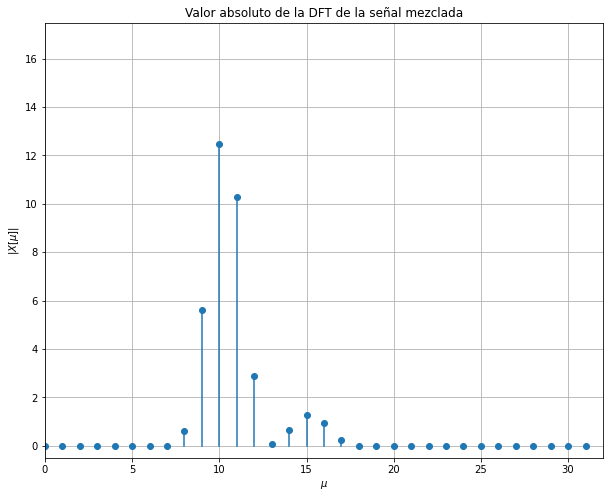

In [18]:
dft_signal_mixture_window(32, amp1=1, period1=10.3, amp2=0.1, period2=15.2, window=np.blackman(32))

Se puede apreciar que el espectro de la segunda se√±al exponencial con el nivel m√°s bajo es visible.

Haciendo un comparativo de los valores obtenidos en las graficas, analizando los puntos indicados de las diferentes ventanas, podemos realizar la siguiente tabla:

#######################################

| window function | Œ©0 | Œ©1 | W2 |
|---|:---:|:---:|:---:|
| [rectangular](#Rectangular-Window) | 1 | 0.5 | -12.5 dB |
| [Barlett](#Triangular-Window) | 2 | 0.6 | -26 |
| [Hann](#Hann-Window) | 2 | 0.71 | -31 |
| [Blackman](#Blackman-Window) | 3 | 0.8 | -57.5 |
| [Flat-Top](#Flat-Top-Window) | 5.7 | 1.9 | -92.9 |





Examinando el efecto de las funciones de ventana para diferencias de frecuencia y nivel tanto peque√±o como grande, al momento de analizar que funci√≥n de ventana es la m√°s adecuada para cada situaci√≥n, se noto que la funci√≥n de ventana rectangular es muy adecuada para identificar dos o m√°s se√±ales con amplitudes comparables y s√≥lo peque√±as diferencias de frecuencia. Esto se debe a su estrecho l√≥bulo principal. Las funciones de ventana que presentan un mayor decaimiento de los l√≥bulos laterales son muy adecuadas para la identificaci√≥n de se√±ales con niveles y frecuencias bastante diferentes.